In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hf = pd.read_csv("D:\Downloads\heart_failure_clinical_records_dataset.csv")


In [3]:
hf.platelets = hf.platelets/1000

In [4]:
hf["CPK"] = hf["creatinine_phosphokinase"]
hf = hf.drop("creatinine_phosphokinase", axis=1)

In [5]:
numerical_features = ["age", "CPK", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium"]
categorical_features = ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking"]

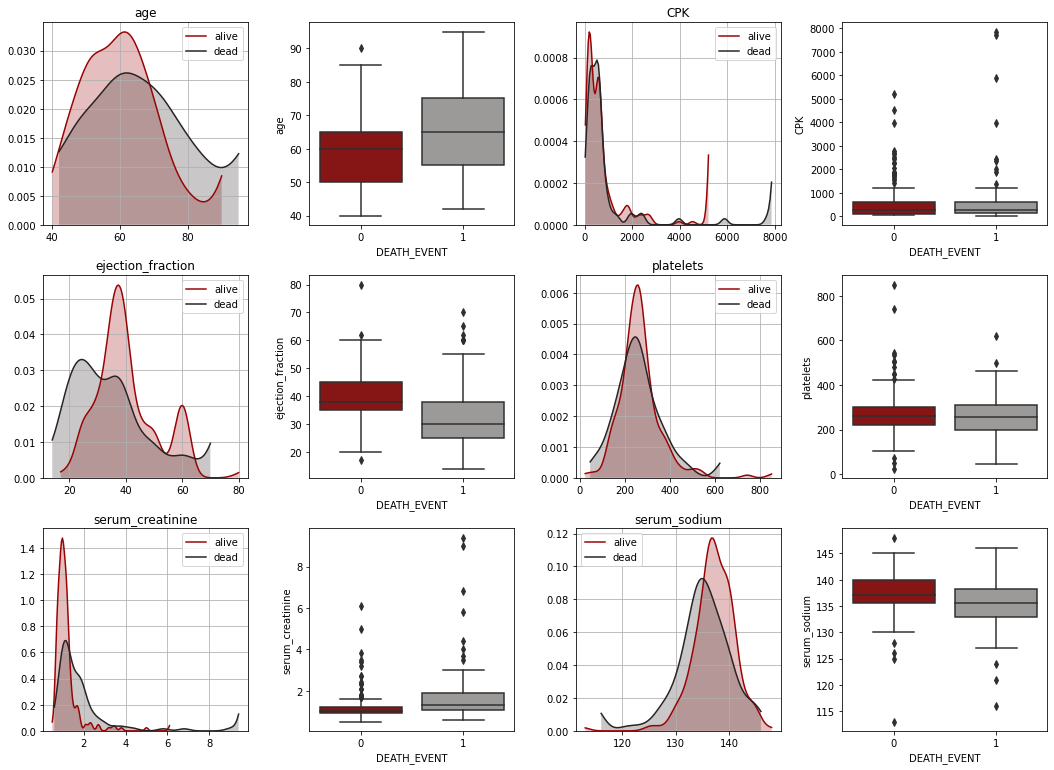

In [6]:
plt.figure(figsize=(18, 27))

for i, col in enumerate(numerical_features):
    plt.subplot(6, 4, i*2+1)
    plt.subplots_adjust(hspace =.25, wspace=.3)
    
    plt.grid(True)
    plt.title(col)
    sns.kdeplot(hf.loc[hf["DEATH_EVENT"]==0, col], label="alive", color = "#990303", shade=True, kernel='gau', cut=0)
    sns.kdeplot(hf.loc[hf["DEATH_EVENT"]==1, col], label="dead",  color = "#292323", shade=True, kernel='gau', cut=0)
    plt.subplot(6, 4, i*2+2) 
    sns.boxplot(y = col, data = hf, x="DEATH_EVENT", palette = ["#990303", "#9C9999"])

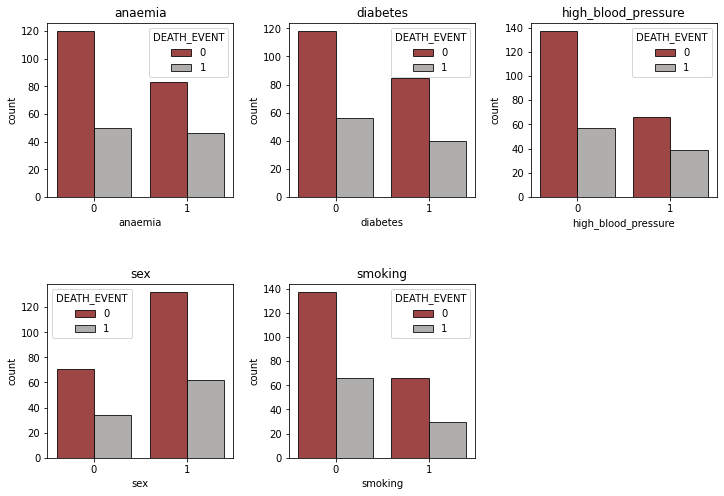

In [7]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(categorical_features):
    plt.subplot(2, 3, i+1)
    plt.title(col)
    plt.subplots_adjust(hspace =.5, wspace=.3)
    sns.countplot(data=hf, x=col, hue="DEATH_EVENT", palette = ["#990303", "#9C9999"], alpha=0.8, edgecolor="k", linewidth=1)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
import matplotlib.image as mpimg
from matplotlib import gridspec

hf_norm = hf.copy()

for i, col in enumerate(numerical_features):
    hf_norm[[col]] = StandardScaler(with_mean=True, with_std=True).fit_transform(hf_norm[[col]])

In [10]:
all_features = categorical_features.copy()
all_features.extend(numerical_features)

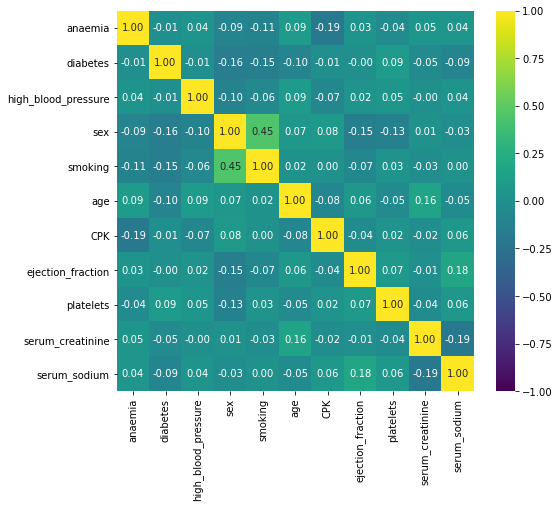

In [11]:
plt.figure(figsize=(8, 7))
sns.heatmap(hf_norm[all_features].corr(method='pearson'), vmin=-1, vmax=1, cmap='viridis', annot=True, fmt='.2f');

In [12]:
from sklearn.model_selection import train_test_split, StratifiedKFold

In [13]:
train_ratio = 0.75
val_ratio = 0.25

ho_train_df, ho_val_df = train_test_split(hf_norm, train_size = train_ratio, random_state=42)
unnorm_ho_train_df, unnorm_ho_val_df = train_test_split(hf, train_size = train_ratio, random_state=42)

print("Holdout split:")
print(f"Train samples: {len(ho_train_df)}")
print(f"Validation/Test samples: {len(ho_val_df)}")

Holdout split:
Train samples: 224
Validation/Test samples: 75


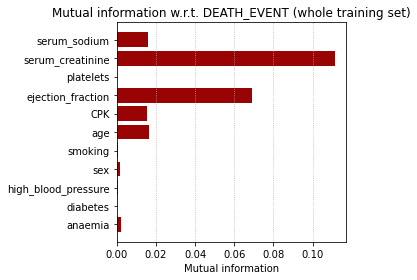

In [14]:
from sklearn.feature_selection import mutual_info_classif

    
MI = (mutual_info_classif(ho_train_df[all_features],
                             ho_train_df["DEATH_EVENT"], n_neighbors=20,
                             discrete_features=[True, True, True, True, True, False, False, False, False, False, False],
                             random_state=42))

plt.figure(figsize=(5.4, 4))
plt.barh(y=all_features, width=MI, color="#990303")
plt.title("Mutual information w.r.t. DEATH_EVENT (whole training set)");
plt.xlabel("Mutual information")
plt.gca().xaxis.grid(True, linestyle=':');
plt.tight_layout();

In [15]:
X = hf.iloc[:,[3,6,7,12]]

In [16]:
Y = hf.iloc[:,11]

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train ,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
sc = StandardScaler()

In [21]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
classifier = LogisticRegression(random_state=0)

In [26]:
classifier.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [27]:
y_pred = classifier.predict(X_test)

In [28]:
classifier.score(X_test,Y_test)

0.76

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
print(cm)

[[45  3]
 [15 12]]


In [30]:
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(Y_test, y_pred)) 

Accuracy :  0.76


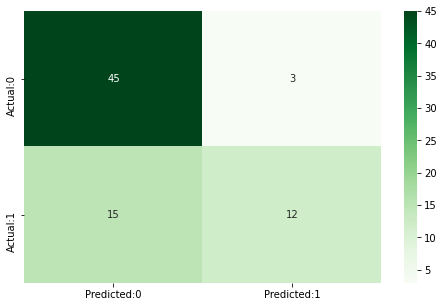

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.75      0.94      0.83        48
           1       0.80      0.44      0.57        27

    accuracy                           0.76        75
   macro avg       0.78      0.69      0.70        75
weighted avg       0.77      0.76      0.74        75



In [35]:
from sklearn.metrics import confusion_matrix, classification_report 
  
cm = confusion_matrix(Y_test, y_pred) 
conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (8, 5)) 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens") 
plt.show() 
  
print('The details for confusion matrix is =') 
print (classification_report(Y_test, y_pred)) 